In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 71.6 MB/s eta 0:00:00
   ━━━

In [ ]:
import pycaret

In [ ]:
from pycaret.utils import version
version()

'3.3.2'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [16]:
data = pd.read_csv('df_test.csv')

In [17]:
imputer = SimpleImputer(strategy='mean')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [18]:
data.head()

,price,bedrooms,grade,living_in_m2,real_bathrooms,month,quartile_zone
0,235000.0,3.0,7.0,121.70293,1.0,3.0,1.0
1,998000.0,4.0,10.0,350.24431,3.0,9.0,1.0
2,430000.0,1.0,7.0,58.52889,1.0,12.0,4.0
3,300000.0,3.0,6.0,117.05778,1.0,5.0,3.0
4,243500.0,3.0,6.0,196.02533,3.0,8.0,1.0


In [20]:
from pycaret.clustering import *
kMeanClusteringParameters = setup(data)

,Description,Value
0,Session id,610
1,Original data shape,"(6948, 7)"
2,Transformed data shape,"(6948, 7)"
3,Numeric features,7
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5730,16742.0335,0.5450,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5592,21256.9201,0.5222,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5433,25549.2694,0.5135,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

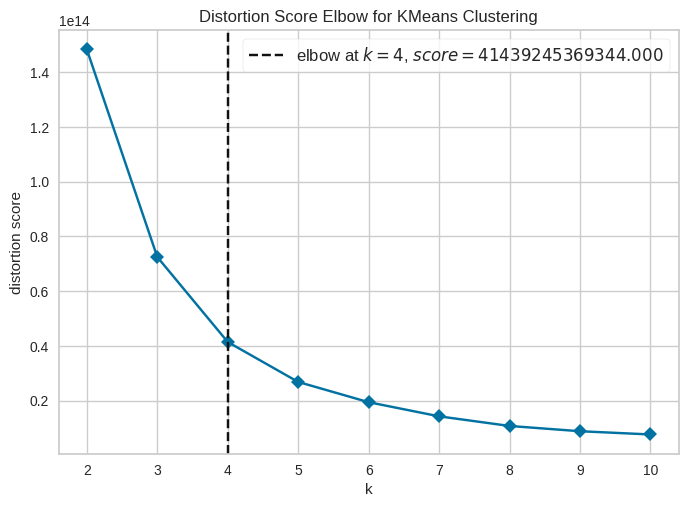

In [22]:
setup(data, verbose=False)
r1 = []
r2 = []
r3 = []

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)
labels=x.fit_predict(data)
r1.append(silhouette_score(data,labels))
r1.append(calinski_harabasz_score(data,labels))
r1.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)
labels=x.fit_predict(data)
r2.append(silhouette_score(data,labels))
r2.append(calinski_harabasz_score(data,labels))
r2.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)
labels=x.fit_predict(data)
r3.append(silhouette_score(data,labels))
r3.append(calinski_harabasz_score(data,labels))
r3.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'cluster')


plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

Normalized

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1857,2356.5549,1.7073,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1934,2110.6717,1.5482,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1808,1820.4620,1.5332,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

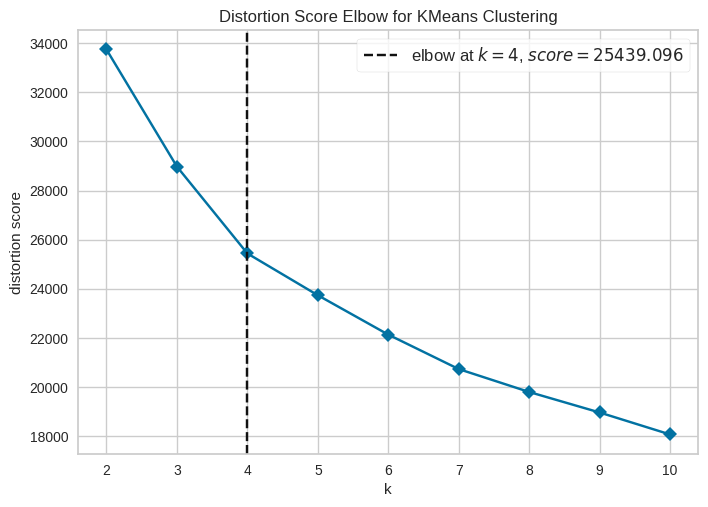

In [28]:
setup(data = data, normalize = True, normalize_method = 'zscore', verbose=False)
r4 = []
r5 = []
r6 = []
print("Normalized\n")
print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)
labels=x.fit_predict(data)
r4.append(silhouette_score(data,labels))
r4.append(calinski_harabasz_score(data,labels))
r4.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)
labels=x.fit_predict(data)
r5.append(silhouette_score(data,labels))
r5.append(calinski_harabasz_score(data,labels))
r5.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)
plot_model(x, plot = 'cluster')
labels=x.fit_predict(data)
r6.append(silhouette_score(data,labels))
r6.append(calinski_harabasz_score(data,labels))
r6.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')

PCA

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5730,16742.0094,0.5450,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5579,21260.5697,0.5248,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5433,25549.3109,0.5135,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

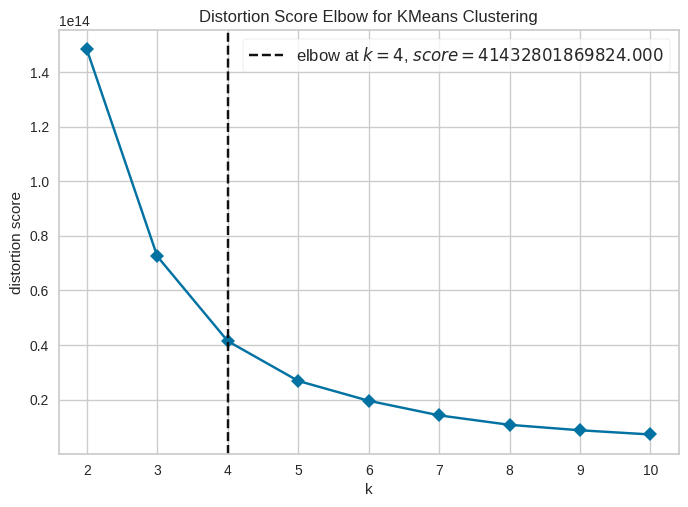

In [ ]:
setup(data = data, pca = True, pca_method = 'linear', verbose=False)
r7 = []
r8 = []
r9 = []

print("PCA\n")
print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)
labels=x.fit_predict(data)
r10.append(silhouette_score(data,labels))
r10.append(calinski_harabasz_score(data,labels))
r10.append(davies_bouldin_score(data,labels))

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)
labels=x.fit_predict(data)
r11.append(silhouette_score(data,labels))
r11.append(calinski_harabasz_score(data,labels))
r11.append(davies_bouldin_score(data,labels))

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)
labels=x.fit_predict(data)
r12.append(silhouette_score(data,labels))
r12.append(calinski_harabasz_score(data,labels))
r12.append(davies_bouldin_score(data,labels))

plot_model(x, plot = 'cluster')


plot_model(x, plot = 'elbow')
plot_model(x, plot = 'tsne')